In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the training and test datasets

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Save original IDs before scaling

original_ids = test['Id'].copy()

In [4]:
# Take a quick look at the first few rows of the data

train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
# Check the structure of the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Check the structure of the test data

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
# Summary statistics of the training data

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


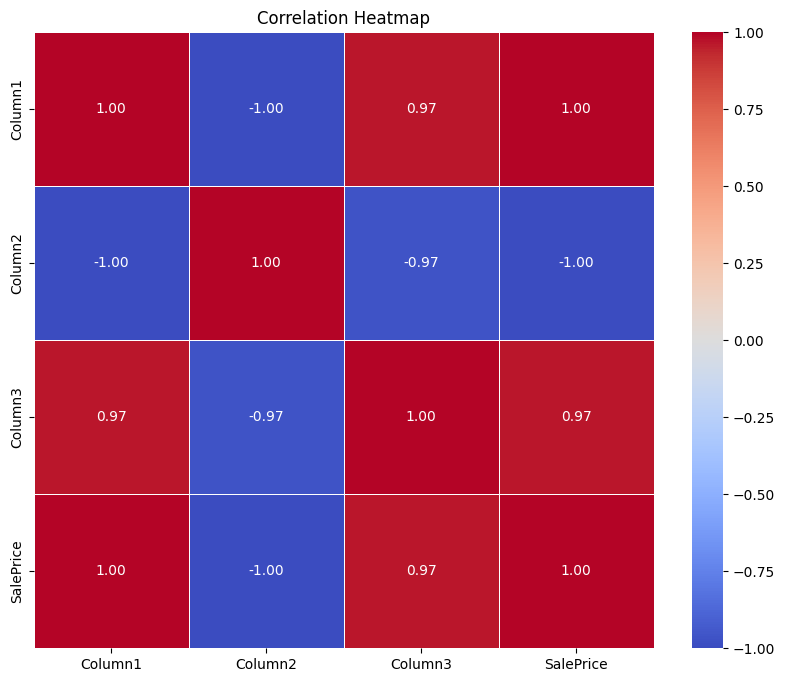

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Column1': [1, 2, 3, 4],
    'Column2': [4, 3, 2, 1],
    'Column3': [1, 2, np.nan, 4],
    'SalePrice': [100, 200, 300, 400]
}
df = pd.DataFrame(data)

# Handle missing values (simple imputation for the sake of visualization)
df.fillna(df.mean(), inplace=True)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Check for missing values in the train dataset

missing_values = train.isnull().sum().sort_values(ascending=False)

# Display the columns with missing values

missing_values[missing_values > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [13]:
# Calculate the number of missing values and their percentage

missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train)) * 100

# Combine both into a single DataFrame for better readability

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [14]:
# Check for missing values in the train dataset

missing_values = test.isnull().sum().sort_values(ascending=False)

# Display the columns with missing values

missing_values[missing_values > 0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
dtype: int64

In [15]:
# Calculate the number of missing values and their percentage

missing_values = test.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(test)) * 100

# Combine both into a single DataFrame for better readability

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127


In [16]:
# Calculate the percentage of missing values for each column in train and test DataFrames

train_missing_percentage = train.isnull().mean()
test_missing_percentage = test.isnull().mean()

# Identify columns with more than 40% missing values
train_cols_to_drop = train_missing_percentage[train_missing_percentage > 0.4].index
test_cols_to_drop = test_missing_percentage[test_missing_percentage > 0.4].index

# Drop the identified columns from both DataFrames
train = train.drop(columns=train_cols_to_drop)
test = test.drop(columns=test_cols_to_drop)

print("ok")

ok


In [17]:
# handling missing values

from sklearn.impute import SimpleImputer

# Numerical and categorical columns in train data
num_cols_train = train.select_dtypes(include=['float64', 'int64']).columns
cat_cols_train = train.select_dtypes(include=['object']).columns

# Numerical and categorical columns in test data
num_cols_test = test.select_dtypes(include=['float64', 'int64']).columns
cat_cols_test = test.select_dtypes(include=['object']).columns

# Ensure only the columns present in both datasets are used
num_cols = [col for col in num_cols_train if col in num_cols_test]
cat_cols = [col for col in cat_cols_train if col in cat_cols_test]

# Initialize imputers for numerical and categorical columns
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical columns
train[num_cols] = imputer_num.fit_transform(train[num_cols])
test[num_cols] = imputer_num.transform(test[num_cols])

# Apply imputation to categorical columns
train[cat_cols] = imputer_cat.fit_transform(train[cat_cols])
test[cat_cols] = imputer_cat.transform(test[cat_cols])

print("ok")

ok


In [18]:
# Check for missing values in the train dataset

missing_values = train.isnull().sum().sort_values(ascending=False)

# Display the columns with missing values

missing_values[missing_values > 0]

Series([], dtype: int64)

In [19]:
# Check for missing values in the test dataset

missing_values = test.isnull().sum().sort_values(ascending=False)

# Display the columns with missing values

missing_values[missing_values > 0]

Series([], dtype: int64)

In [20]:
# encoding

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse

# Fit and transform the training data
train_encoded = pd.DataFrame(encoder.fit_transform(train[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Transform the test data
test_encoded = pd.DataFrame(encoder.transform(test[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
train = pd.concat([train.drop(columns=categorical_cols), train_encoded], axis=1)
test = pd.concat([test.drop(columns=categorical_cols), test_encoded], axis=1)

print("ok")

ok


In [21]:
# scaling 

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assume `train` and `test` are your DataFrames

# Identify numerical columns, excluding 'SalePrice' and 'Id'
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.drop(['SalePrice', 'Id'])

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data (excluding 'SalePrice' and 'Id')
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

# Drop 'Id' column from test set
test = test.drop('Id', axis=1)

# Ensure that test columns match the train columns
for col in numerical_cols:
    if col not in test.columns:
        # Add missing columns with default values
        test[col] = np.nan

# Fill missing values in the test set (if any)
test[numerical_cols] = test[numerical_cols].fillna(0)  # or use another method

# Apply the same scaling to the test data
test[numerical_cols] = scaler.transform(test[numerical_cols])

# If you need to add back the 'SalePrice' column to the train DataFrame
train['SalePrice'] = train['SalePrice'].copy()

print("ok")

ok


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Drop 'Id' column from training data
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the best model (e.g., GradientBoostingRegressor)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)

# Apply log transformation to y and y_pred for RMSE calculation
y_val_log = np.log(y_val)
y_pred_log = np.log(y_pred + 1)  # Adding 1 to avoid log(0)

# Calculate Mean Squared Error on the logarithm of sale prices
mse_log = mean_squared_error(y_val_log, y_pred_log)
rmse_log = np.sqrt(mse_log)

print(f"Validation Root Mean Squared Error (RMSE) on Logarithm of Sale Prices: {rmse_log}")

Validation Root Mean Squared Error (RMSE) on Logarithm of Sale Prices: 0.1427597628866226


In [23]:
# Make predictions on the test set

predictions = model.predict(test)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'Id': original_ids,
    'SalePrice': predictions
})

# Save to a CSV file
submission.to_csv('submission.csv', index=False)